# Assignment 1 – Simple Linear Regression

In [21]:
#y=5x+5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x_values = np.random.randint(0, 100, 100)


In [22]:
y_values=[]
for x in x_values:
  y_values.append(5*x+5)


In [23]:
y_values[:5]

[np.int64(495), np.int64(270), np.int64(95), np.int64(5), np.int64(345)]

In [24]:
y_values = np.array(y_values)
noise = np.random.uniform(-1, 1, size=y_values.shape)
Y_noisy = y_values+ noise

In [25]:
x_train=x_values[:80]
y_train=Y_noisy[:80]
x_test=x_values[80:]
y_test=Y_noisy[80:]

In [26]:
reg_model = LinearRegression()
reg_model.fit(x_train.reshape(-1,1), y_train)#(n_samples, 1)

LinearRegression()

In [27]:
print(reg_model.coef_)
print(reg_model.intercept_)

[5.00167256]
4.975433326291807


### The coefficients is almost the same

In [28]:
y_train_pred = reg_model.predict(x_train.reshape(-1,1))
y_test_pred = reg_model.predict(x_test.reshape(-1,1))

In [29]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

In [30]:
print("=== Training Performance ===")
print(f"MAE: {mae_train:.3f}")
print(f"MSE: {mse_train:.3f}")
print(f"R²: {r2_train:.3f}")

=== Training Performance ===
MAE: 0.461
MSE: 0.296
R²: 1.000


In [31]:
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [32]:
print("\n=== Testing Performance ===")
print(f"MAE: {mae_test:.3f}")
print(f"MSE: {mse_test:.3f}")
print(f"R²: {r2_test:.3f}")


=== Testing Performance ===
MAE: 0.671
MSE: 0.539
R²: 1.000


### As the results of train and test is really close the model is not overfitted or underfitted

#### The two metrics of erro in both train and test is near and small this is good .
#### The R square in both are perfict fit then the model represent the variation in the data well.

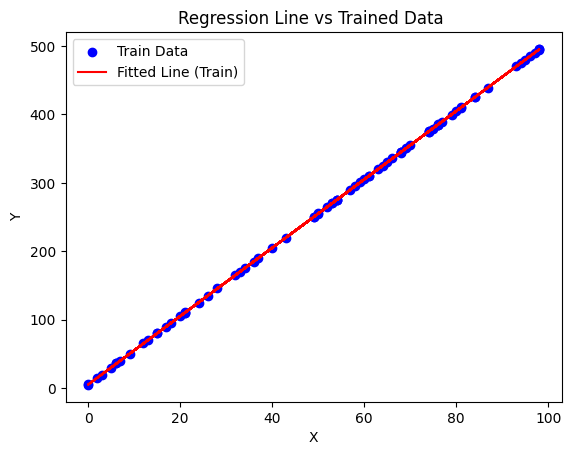

In [33]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_train, y_train_pred, color='red', label='Fitted Line (Train)')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Line vs Trained Data ')
plt.legend()
plt.show()

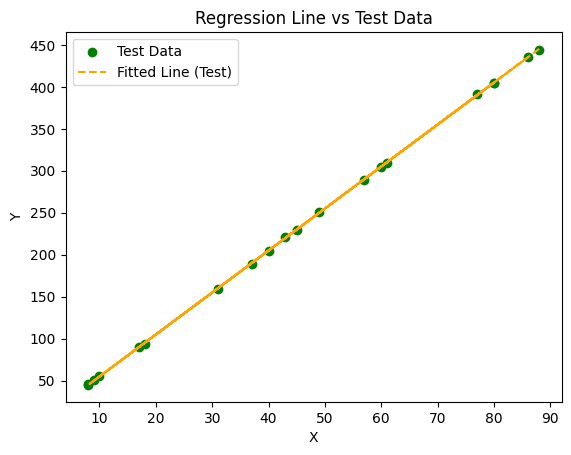

In [34]:
plt.scatter(x_test, y_test, color='green', label='Test Data')
plt.plot(x_test, y_test_pred, color='orange', linestyle='--', label='Fitted Line (Test)')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Line vs Test Data')
plt.legend()
plt.show()

# Assignment 2 – Multiple Linear Regression

In [35]:
# y=5x1+4x2+4
x1_values = np.random.randint(0, 100, 100)
x2_values = np.random.randint(0, 100, 100)

In [36]:
x1_values = np.array(x1_values)
x2_values = np.array(x2_values)

y_values = 5*x1_values + 4*x2_values + 4
y_values[:5]

array([323,  54, 155, 574, 707])

In [37]:
noise = np.random.uniform(-1, 1, size=y_values.shape)
Y_noisy = y_values+ noise

In [38]:
x_train=x_values[:80]
y_train=Y_noisy[:80]
x_test=x_values[80:]
y_test=Y_noisy[80:]

In [39]:
X = np.column_stack((x1_values, x2_values))

In [40]:
for x in X[:5]:
  print(x)

[35 36]
[ 2 10]
[ 7 29]
[50 80]
[71 87]


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y_values, test_size=0.2, random_state=42)#another way than simple linear regression

In [42]:
reg_model = LinearRegression()

In [43]:
reg_model.fit(x_train, y_train)

LinearRegression()

In [44]:
print("Coefficients (slope):", reg_model.coef_)
print("Intercept:", reg_model.intercept_)

Coefficients (slope): [5. 4.]
Intercept: 4.0


#### The slopes are the same the intersept is almost the same

In [45]:
y_train_pred = reg_model.predict(x_train)
y_test_pred = reg_model.predict(x_test)


In [46]:
print("=== Training Performance ===")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("R²:", r2_score(y_train, y_train_pred))

=== Training Performance ===
MAE: 2.4424906541753444e-14
MSE: 1.7197167733818057e-27
R²: 1.0


In [47]:
print("\n=== Testing Performance ===")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R²:", r2_score(y_test, y_test_pred))


=== Testing Performance ===
MAE: 2.1316282072803006e-14
MSE: 1.4944180988506848e-27
R²: 1.0


#### The model perfectly fits both training and testing data, as indicated by R² = 1.0.
#### Extremely low MAE and MSE values show that predictions are almost identical to the true values.
#### No overfitting or underfitting

# Assignment 3 – Polynomial Regression

In [48]:
#y=2x^2+7x+6
from sklearn.preprocessing import PolynomialFeatures

x_values = np.random.randint(0, 100, 100)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x_values.reshape(-1, 1))
X_poly[:5]#[1, X, X²]



array([[1.000e+00, 8.400e+01, 7.056e+03],
       [1.000e+00, 1.200e+01, 1.440e+02],
       [1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 8.800e+01, 7.744e+03],
       [1.000e+00, 3.700e+01, 1.369e+03]])

In [49]:
coefficients = np.array([6, 7, 2])
y_values = X_poly.dot(coefficients)
noise = np.random.uniform(-1, 1, size=y_values.shape)
y_noise = y_values+noise

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X_poly, y_noise, test_size=0.2, random_state=42)


In [51]:
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

LinearRegression()

In [52]:
y_train_pred = reg_model.predict(x_train)
y_test_pred = reg_model.predict(x_test)

In [53]:
print("=== Training Performance ===")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("R²:", r2_score(y_train, y_train_pred))

=== Training Performance ===
MAE: 0.5090630047116796
MSE: 0.32221486549272144
R²: 0.9999999909127593


In [54]:
print("\n=== Testing Performance ===")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R²:", r2_score(y_test, y_test_pred))


=== Testing Performance ===
MAE: 0.5619045336970878
MSE: 0.3826036317809797
R²: 0.9999999884036518


#### No overfitting or underfitting. As the results of train and test is really close the model is not overfitted or underfitted

#### the R squared near to one is good and the MSE&MAE is small this is good sign